# SUPERVISED METHODS

In this notebook I wil practice different supervised methods (like naive-bayes, knn...) and apply them to a practical case.

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.utils import check_random_state
from sklearn import tree

# Visualizar árboles
from IPython.display import Image
import pydotplus
from six import StringIO

# UMAP para la reducción de dimensionalidad
import umap

# Visualización
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation].astype(int)
X = X.reshape((X.shape[0], -1))

In [4]:
fig, axis = plt.subplots(1, 10, figsize=(12, 6))
for i, ax in zip(range(10), axis):
    ax.imshow(X[y == i][0].reshape(28, 28), cmap='gray_r')
    ax.set_title(str(i))
    ax.axis('off')
plt.tight_layout()

In [5]:
all_data = pd.DataFrame(X)
all_data['y'] = y

sample_data = all_data.sample(frac = 0.1, random_state=24)
X = sample_data.drop(columns=['y'])
y = sample_data['y']

print(all_data.shape)
print(sample_data.shape)

(70000, 785)
(7000, 785)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(sample_data, y, test_size = 0.2, random_state = 24)

c:\Users\iredi\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\iredi\anaconda3\envs\myenv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\iredi\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\iredi\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


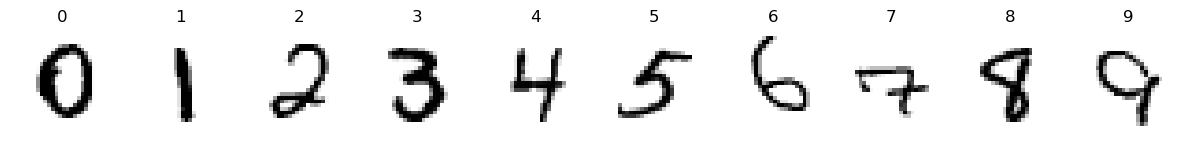

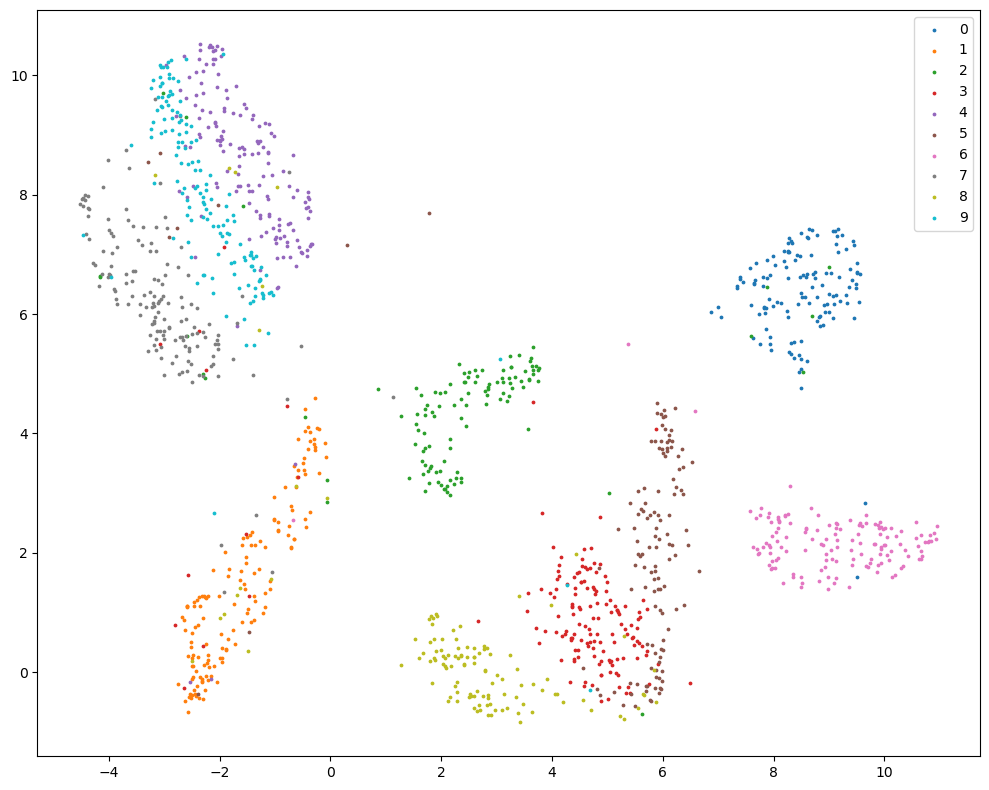

In [7]:
model = umap.UMAP(n_components=2, random_state=42)
model.fit(X_train)
X_train_projection = model.transform(X_train)
X_test_projection = model.transform(X_test)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for i in range(10):
    ax.scatter(X_test_projection[y_test == i,0], X_test_projection[y_test == i,1], s=3, label=str(i))
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# vamos a crear la meshgrid con los valores mínimos y máximos de los ejes x e y
x_min, x_max = X_test_projection[:, 0].min() - 1, X_test_projection[:, 0].max() + 1
y_min, y_max = X_test_projection[:, 1].min() - 1, X_test_projection[:, 1].max() + 1
    
# definimos la función que visualizará la frontera de decisión
def plot_decision_boundaries(model, X_test_projection, y_test):
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    
    # precedimos con el clasificador con los valores de la meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # definimos los colores (uno para cada clase)
    cmap_light = ListedColormap(['gainsboro','lightgreen','peachpuff','lightcyan', 'pink',
                                 'lightyellow','lavender','lightcoral', 'lightskyblue', 'aquamarine'])
    cmap_bold = ['grey','g','sandybrown','c','palevioletred', 
                 'y','mediumpurple','firebrick', 'dodgerblue', 'mediumaquamarine']
    
    # dibujamos las fronteras
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(20,10))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # dibujamos los puntos
    for i in range(10):
        plt.scatter(X_test_projection[y_test == i,0], X_test_projection[y_test == i,1], 
                    s=3, label=str(i), c=cmap_bold[i])
    plt.legend()
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

### Naive bayes

In [9]:
# el modelo
gauss = GaussianNB()
# entrenamos el modelo
gauss.fit(X_train_projection, y_train)
# hacemos una predicción
y_pred = gauss.predict(X_test_projection)

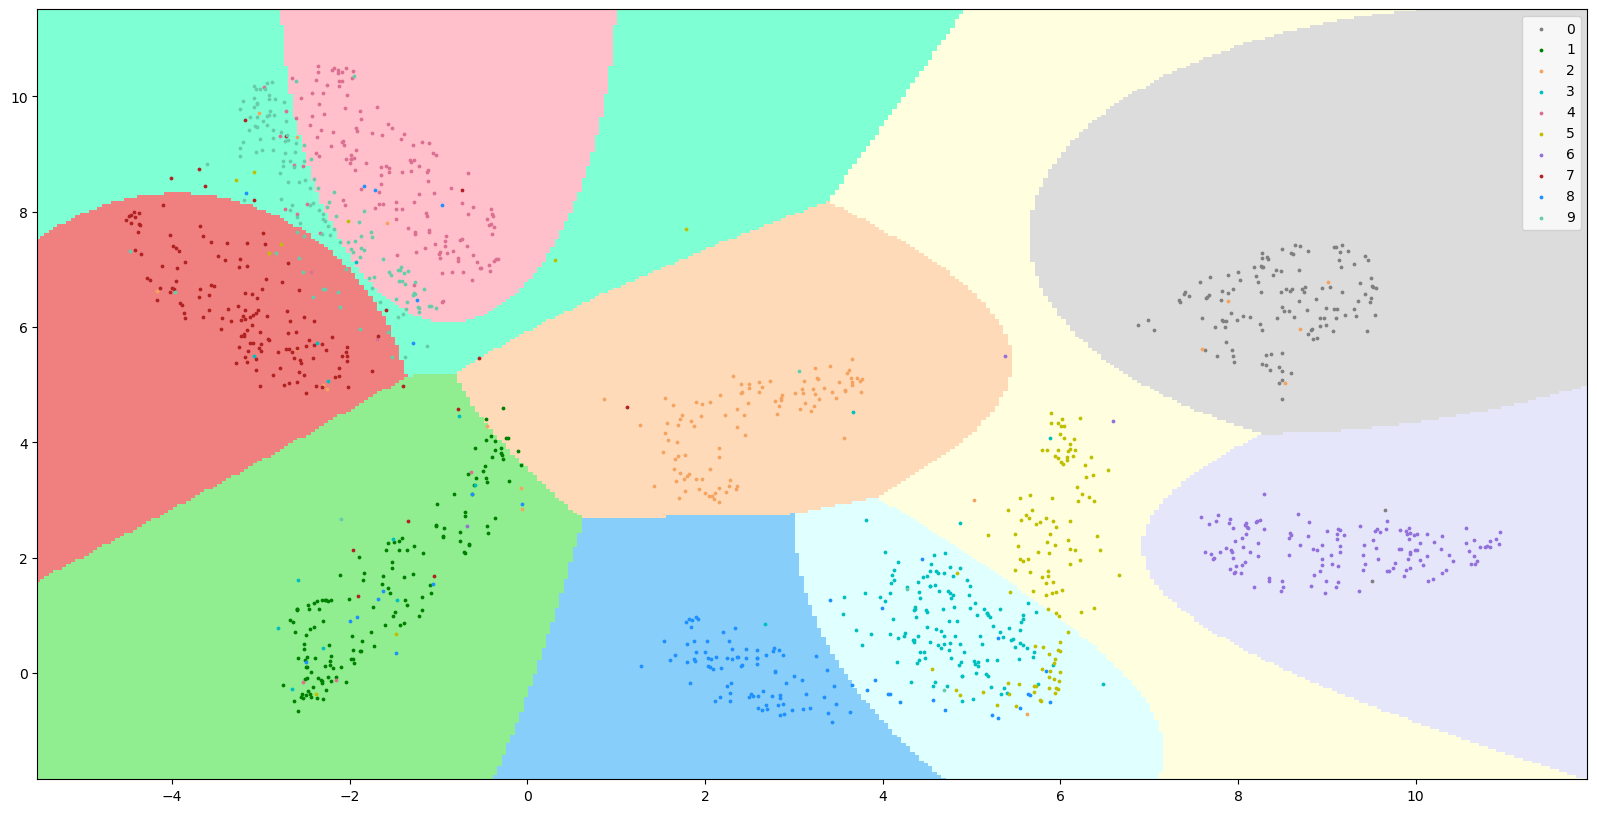

In [10]:
#representamos gráficamente la frontera de decisión
plot_decision_boundaries(gauss, X_test_projection, y_test)
plt.show()

In [11]:
print('Accuracy del clasificador GaussianNB training set: {:.2f}'.format(gauss.score(X_train_projection, y_train)))
print('Accuracy del clasificador GaussianNB test set: {:.2f}'.format(gauss.score(X_test_projection, y_test)))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
      
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy del clasificador GaussianNB training set: 0.86
Accuracy del clasificador GaussianNB test set: 0.84
Confusion matrix:
[[127   0   0   0   0   0   2   0   0   0]
 [  0 143   5   0   0   0   0   0   0   0]
 [  5   3 103   1   1   1   0   5   0   2]
 [  0   8   1 138   1   2   0   3   1   0]
 [  0   3   0   0 142   0   0   2   0   9]
 [  0   2   0  35   1  84   0   2   0   4]
 [  0   1   1   0   0   1 142   0   0   0]
 [  0   6   1   0   1   0   0 136   0   8]
 [  0   9   0  18   4   0   0   0  87   2]
 [  0   1   1   2  49   0   0  16   0  78]]
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       129
           1       0.81      0.97      0.88       148
           2       0.92      0.85      0.88       121
           3       0.71      0.90      0.79       154
           4       0.71      0.91      0.80       156
           5       0.95      0.66      0.78       128
           6       0.99      0.98      0.

En la frontera de decisión que hemos obtenido vemos 10 partes diferenciadas, una por cada número. Aunque por lo general todas están bien delimitadas, la porción para el número 9 (el color verde/azul de la parte inferior derecha) tiene una zona más desforme que el resto. Por lo general, vemos que los números están bien ordenados en su zona, pero esta parte inferior derecha podemos apreciar que hay muchos números que no están bien clasificados. Hemos obtenido una predicción con un acierto del .86. Es un buen porcentaje, pero se puede mejorar.

### KNN

In [12]:
# el modelo, con dos vecinos
knn = KNeighborsClassifier(2)
# entrenamos el modelo
knn.fit(X_train_projection, y_train)
# la preddicón
y_pred = knn.predict(X_test_projection)

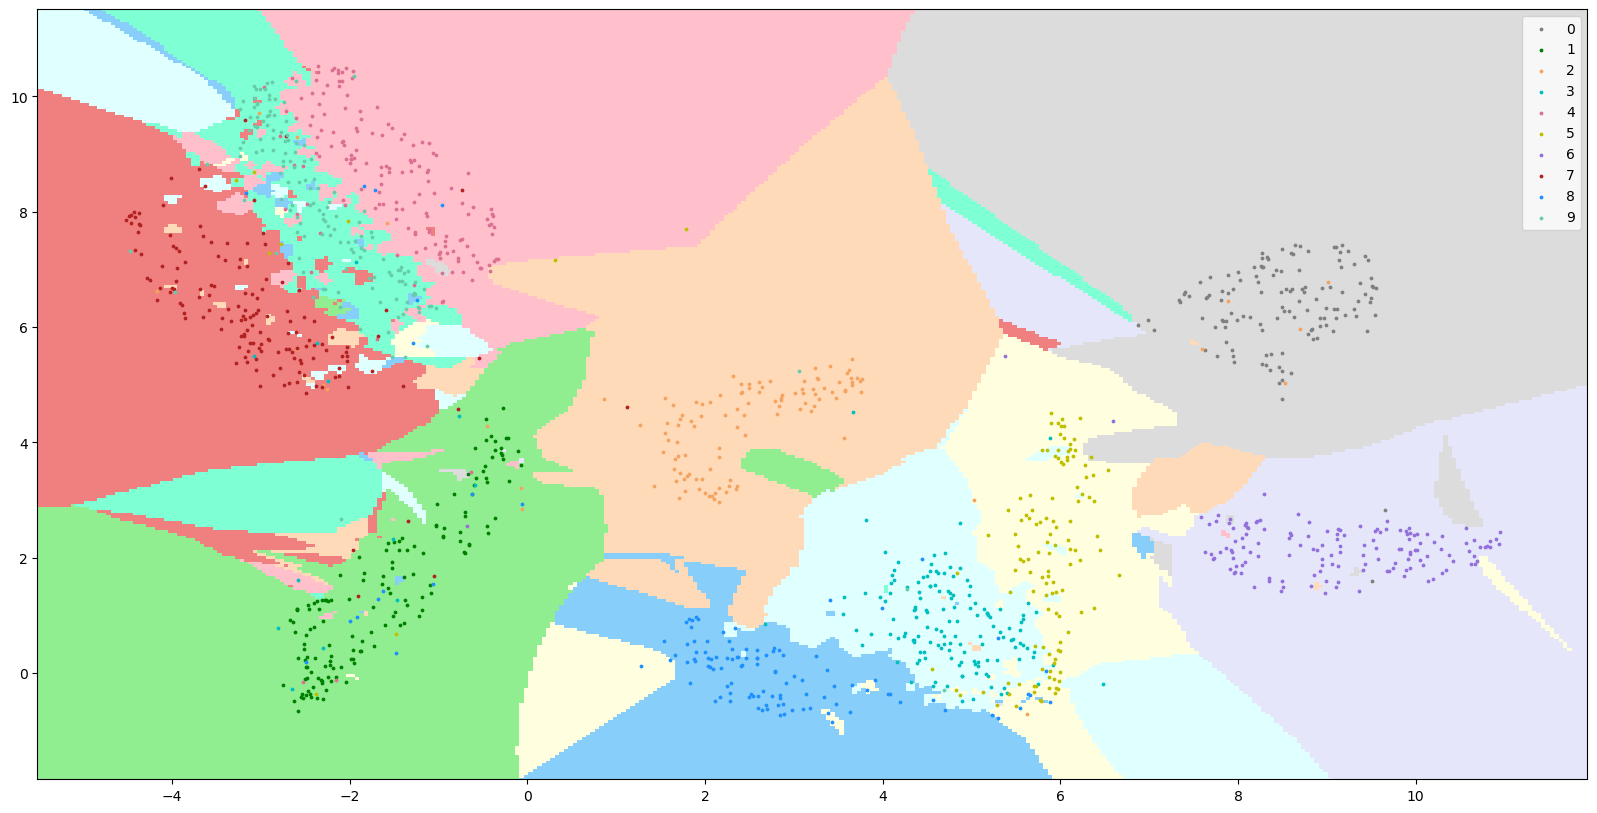

In [13]:
plot_decision_boundaries(knn, X_test_projection, y_test)
plt.show()

In [14]:
print('Accuracy del clasificador KNN en training set: {:.2f}'.format(knn.score(X_train_projection, y_train)))
print('Accuracy del clasificador KNN test set: {:.2f}'.format(knn.score(X_test_projection, y_test)))

Accuracy del clasificador KNN en training set: 0.94
Accuracy del clasificador KNN test set: 0.87


In [15]:
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
      
print("Classification report:")
print(classification_report(y_test, y_pred))

Confusion matrix:
[[127   0   0   0   0   0   2   0   0   0]
 [  1 147   0   0   0   0   0   0   0   0]
 [  5   3 103   0   1   2   0   5   0   2]
 [  0   7   1 133   1   6   0   3   2   1]
 [  2   3   1   0 139   1   0   1   0   9]
 [  1   2   1  19   2  97   0   1   3   2]
 [  2   1   0   0   0   2 140   0   0   0]
 [  0   4   6   5   3   0   0 129   0   5]
 [  0   9   0   7   3  13   0   1  87   0]
 [  0   1   2   3  12   1   0   8   7 113]]
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       129
           1       0.83      0.99      0.90       148
           2       0.90      0.85      0.88       121
           3       0.80      0.86      0.83       154
           4       0.86      0.89      0.88       156
           5       0.80      0.76      0.78       128
           6       0.99      0.97      0.98       145
           7       0.87      0.85      0.86       152
           8       0.88      0.72      0.

In [16]:
# definimos los parámetros a valorar
grid_params = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10]
}
# definimos la GridSearch
gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 3,
    n_jobs = -1
)
# el resultado
gs_results = gs.fit(X_train_projection, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [17]:
#gs_results.best_estimator_
print("El mejor párametro es:",gs_results.best_params_)
#gs_results.cv_results_

El mejor párametro es: {'n_neighbors': 7}


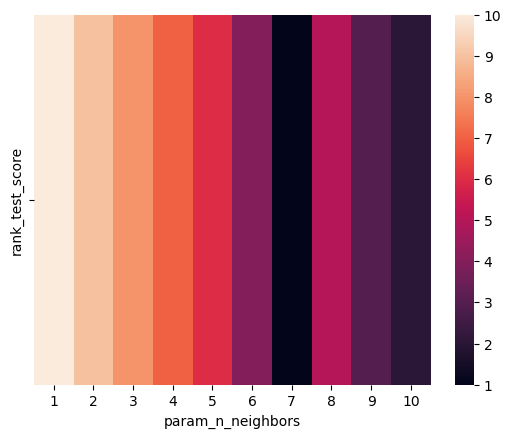

In [18]:
pvt = pd.pivot_table(pd.DataFrame(gs_results.cv_results_),
    values='rank_test_score',  columns=['param_n_neighbors'])
ax = sns.heatmap(pvt)
plt.show(ax)

In [19]:
# repetimos con 7 vecinos
knn = KNeighborsClassifier(7)
knn.fit(X_train_projection, y_train)
y_pred = knn.predict(X_test_projection)

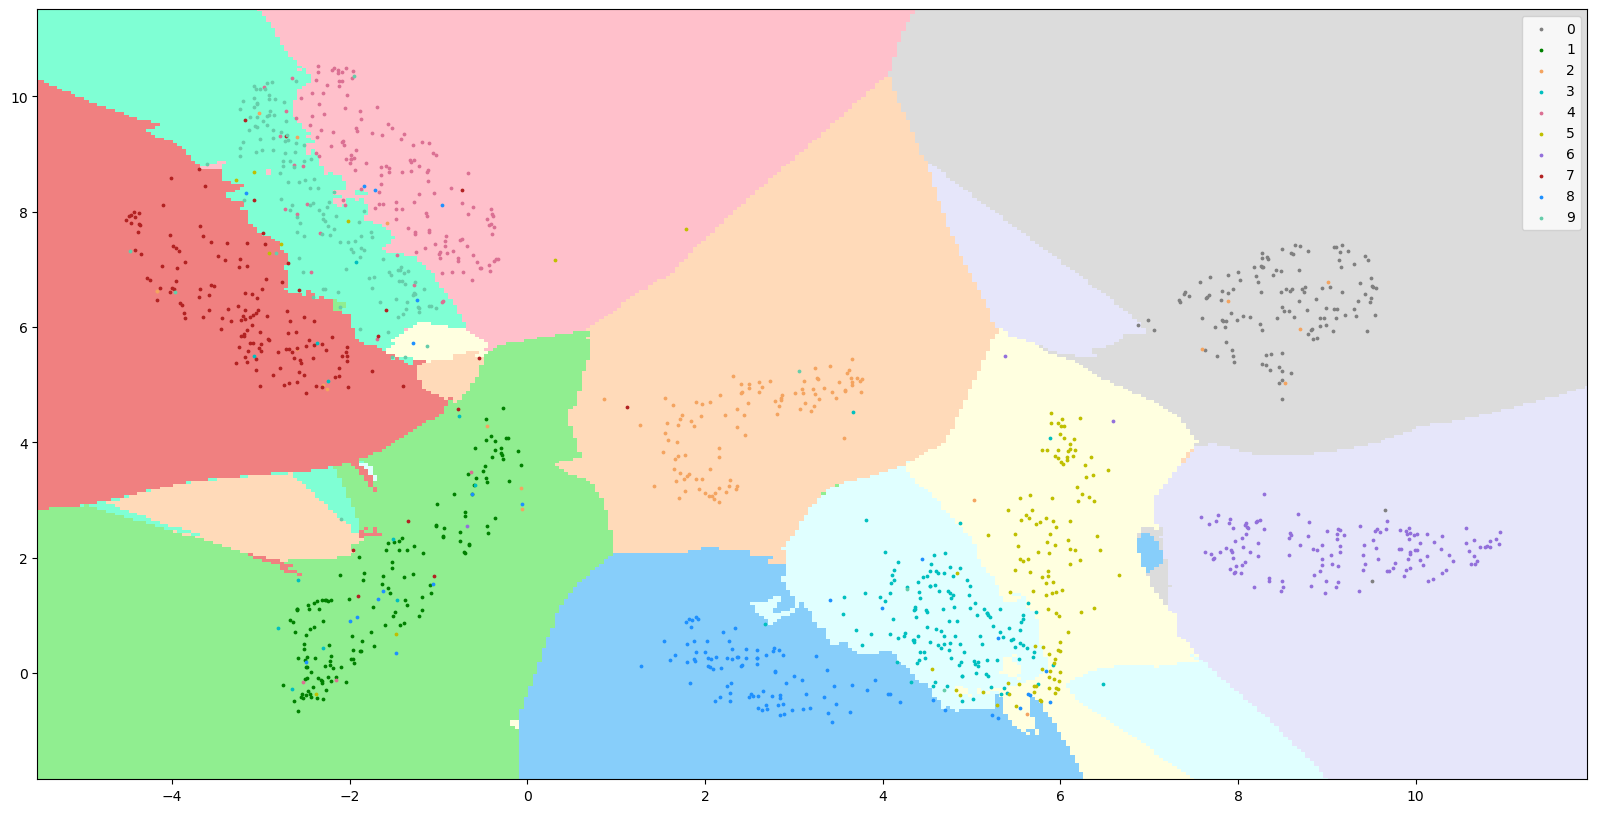

In [20]:
plot_decision_boundaries(knn, X_test_projection, y_test)
plt.show()

In [21]:
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train_projection, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test_projection, y_test)))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
      
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.90
Confusion matrix:
[[126   0   0   0   0   0   3   0   0   0]
 [  0 148   0   0   0   0   0   0   0   0]
 [  5   3 103   0   1   2   0   5   0   2]
 [  0   8   1 131   0   8   0   3   2   1]
 [  0   3   0   0 136   0   0   0   0  17]
 [  0   2   0   8   2 110   0   1   1   4]
 [  0   1   0   0   0   2 142   0   0   0]
 [  0   4   3   0   1   0   0 136   0   8]
 [  0   9   0   4   3   6   0   0  96   2]
 [  0   1   2   2   2   1   0   5   0 134]]
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       129
           1       0.83      1.00      0.91       148
           2       0.94      0.85      0.90       121
           3       0.90      0.85      0.88       154
           4       0.94      0.87      0.90       156
           5       0.85      0.86      0.86       128
           6       0.98      0.98      0.98       145

A la hora de buscar el mejor número de vecinos, hemos obtenido 9 como resultado. Siendo 2, los vecinos que habíamos usado inicialmente, el parámetro que peor funcionaría de los 10 que hemos propuesto. La visualización gráficamente ha mejorado ya que 9 era una mejor opción que 2. Las fronteras de decisión siguen siendo caóticas, pero también han mejorado. Las predicciones del test han mejorado en .03 puntos, pasando de .87 a .90, lo cual es una buena mejora.

### SVM

In [22]:
# los parametros que vamos a usar
tuned_parameters = [{'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.01, 0.1, 1, 10, 50, 100, 200]}]
# definimos la GridSearch
gs = GridSearchCV(
    SVC(),
    tuned_parameters,
    verbose = 1,
    cv = 3,
    n_jobs = -1
)
# los resultados
gs_results = gs.fit(X_train_projection, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


In [23]:
#gs_results.best_estimator_
print("El mejor párametro es:",gs_results.best_params_)
#gs_results.cv_results_

El mejor párametro es: {'C': 1, 'gamma': 10}


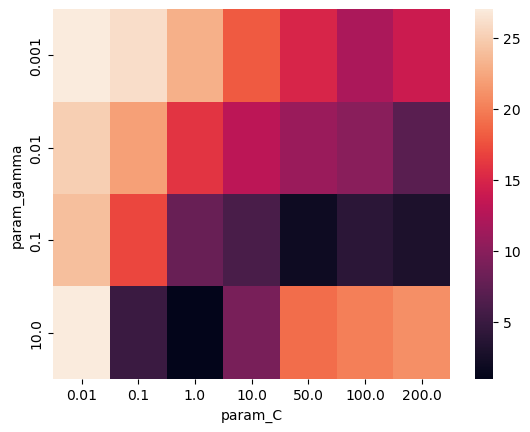

In [24]:
pvt = pd.pivot_table(pd.DataFrame(gs_results.cv_results_),
    values='rank_test_score', index= 'param_gamma', columns=['param_C'])
ax = sns.heatmap(pvt)
plt.show(ax)

In [25]:
svc = SVC(C=1, gamma=10)
svc.fit(X_train_projection, y_train)
y_pred = svc.predict(X_test_projection)

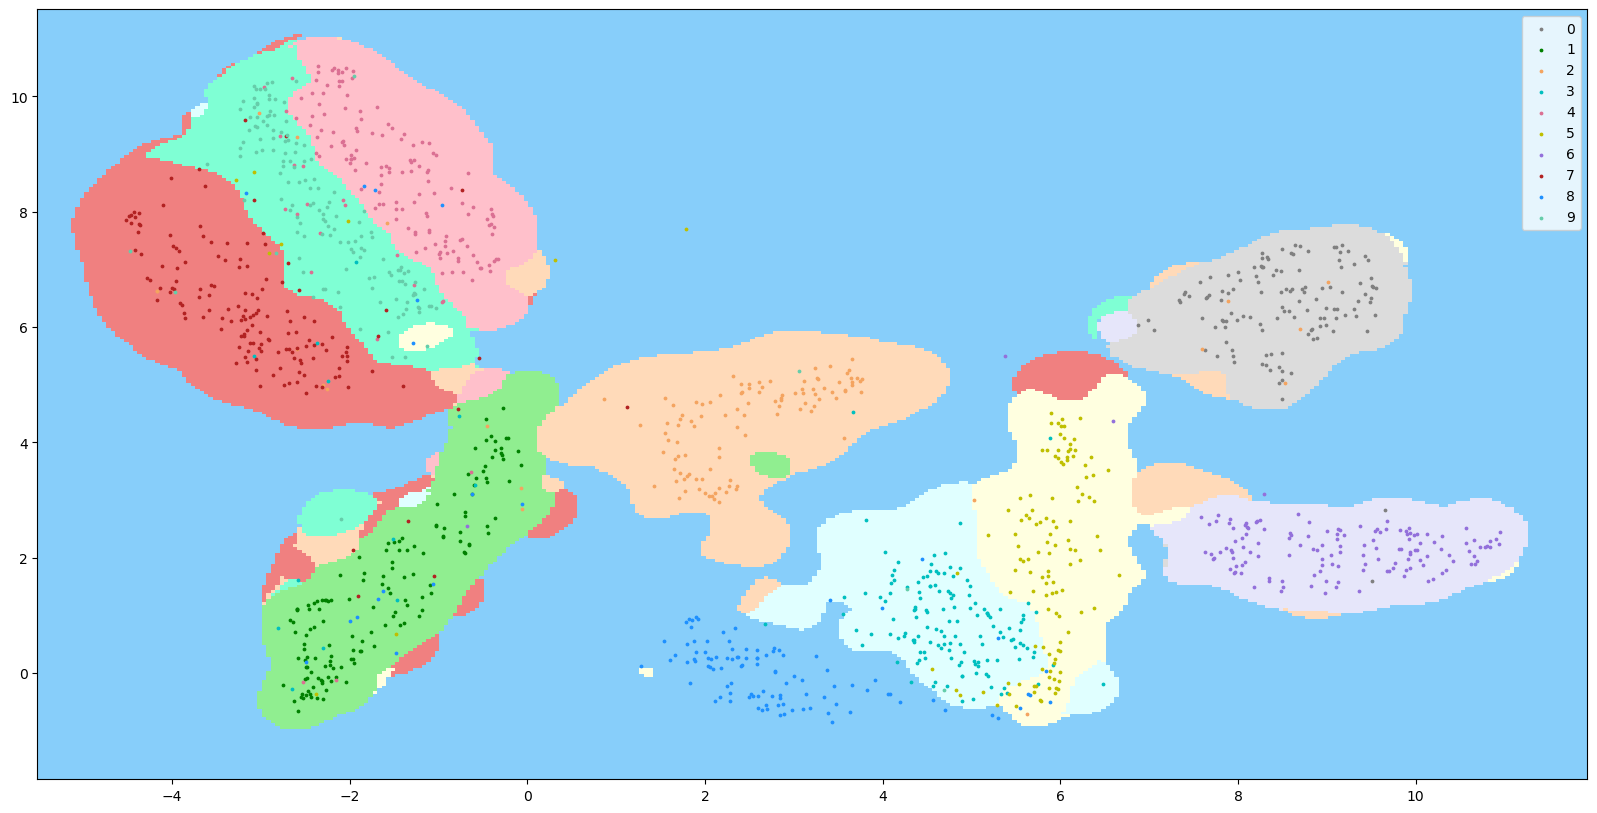

In [26]:
plot_decision_boundaries(svc, X_test_projection, y_test)
plt.show()

In [27]:
print('Accuracy of SVC classifier on training set: {:.2f}'.format(svc.score(X_train_projection, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'.format(svc.score(X_test_projection, y_test)))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
      
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy of SVC classifier on training set: 0.93
Accuracy of SVC classifier on test set: 0.90
Confusion matrix:
[[126   0   0   0   0   0   3   0   0   0]
 [  0 148   0   0   0   0   0   0   0   0]
 [  5   3 103   0   1   2   0   5   0   2]
 [  0   7   1 130   0   7   0   4   4   1]
 [  0   3   0   0 135   0   0   0   0  18]
 [  0   2   0   9   0 109   0   1   3   4]
 [  0   1   0   0   0   1 141   0   2   0]
 [  0   4   2   0   1   0   0 137   1   7]
 [  0   9   0   4   3   6   0   0  96   2]
 [  0   0   1   2   1   1   0   3   0 139]]
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       129
           1       0.84      1.00      0.91       148
           2       0.96      0.85      0.90       121
           3       0.90      0.84      0.87       154
           4       0.96      0.87      0.91       156
           5       0.87      0.85      0.86       128
           6       0.98      0.97      0.98       145
 

### Decision Tress

In [28]:
tuned_parameters = [{'max_depth': [4,5,6,7,8,9,10],
                     'min_samples_split': [2,10,20,50,100]}]

gs = GridSearchCV(
    DecisionTreeClassifier(),
    tuned_parameters,
    verbose = 1,
    cv = 3,
    n_jobs = -1
)

gs_results = gs.fit(X_train_projection, y_train)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


In [29]:
#gs_results.best_estimator_
print("El mejor párametro es:",gs_results.best_params_)
#gs_results.cv_results_

El mejor párametro es: {'max_depth': 8, 'min_samples_split': 10}


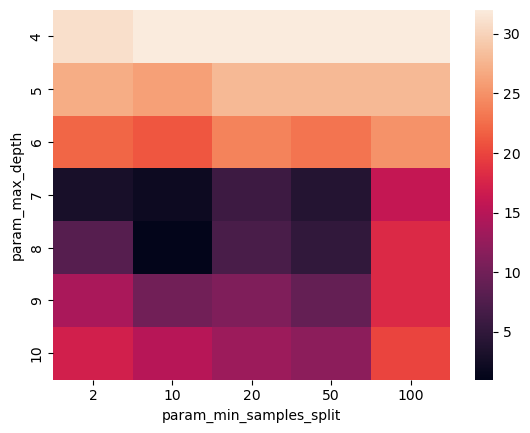

In [30]:
pvt = pd.pivot_table(pd.DataFrame(gs_results.cv_results_),
    values='rank_test_score', index='param_max_depth', columns=['param_min_samples_split'])
ax = sns.heatmap(pvt)
plt.show(ax)

In [31]:
tree = DecisionTreeClassifier(max_depth = 8, min_samples_split = 50)
tree.fit(X_train_projection,y_train)
y_pred = tree.predict(X_test_projection)

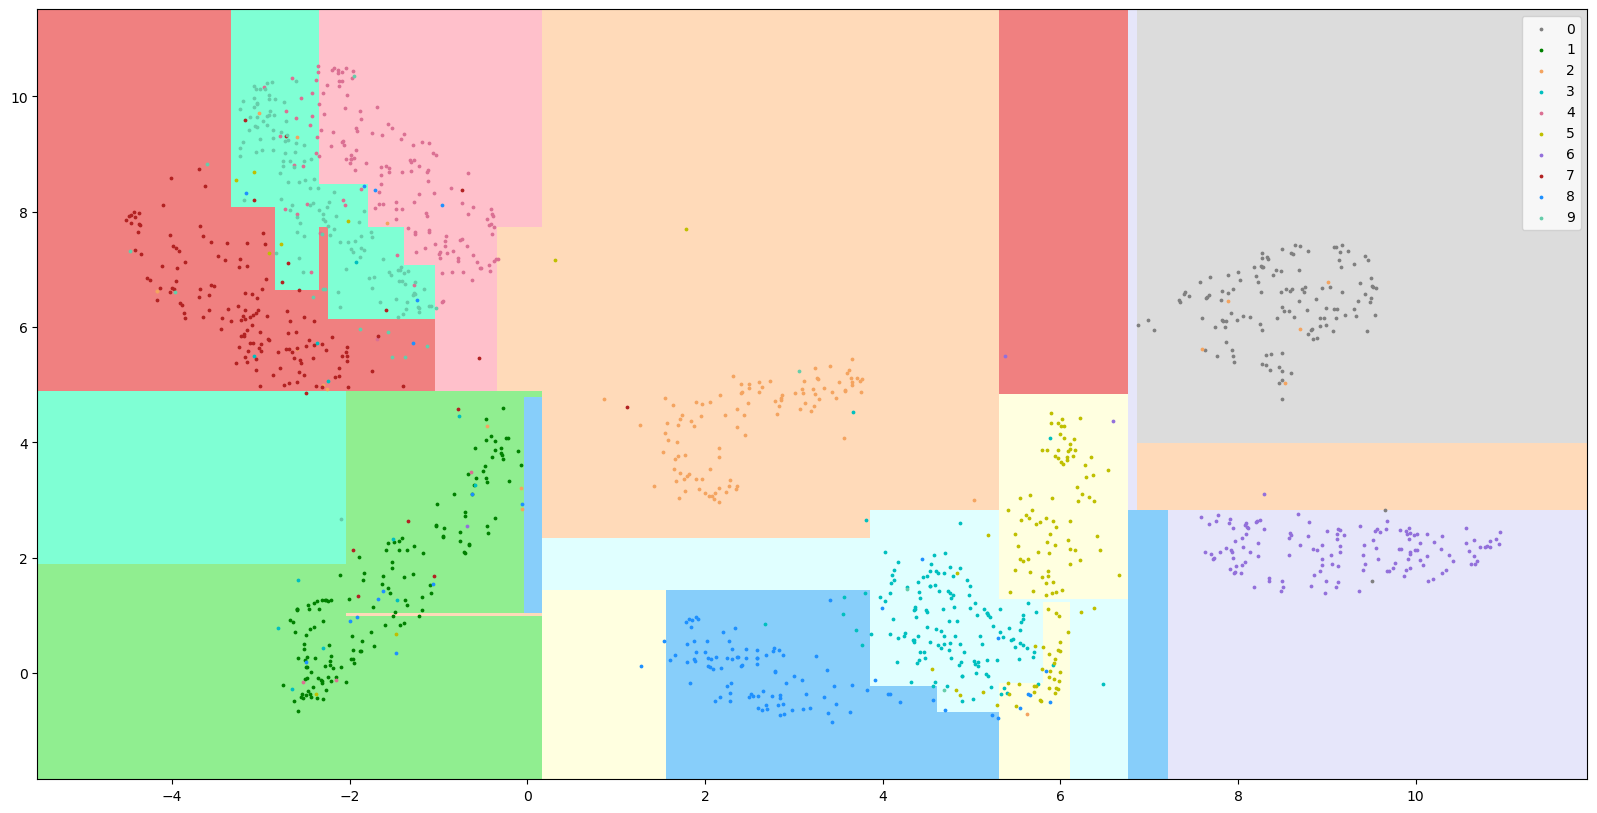

In [32]:
plot_decision_boundaries(tree, X_test_projection, y_test)
plt.show()

In [33]:
print('Accuracy del Tree Classifier en training set: {:.2f}'.format(tree.score(X_train_projection, y_train)))
print('Accuracy del Tree Classifier en test set: {:.2f}'.format(tree.score(X_test_projection, y_test)))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
      
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy del Tree Classifier en training set: 0.93
Accuracy del Tree Classifier en test set: 0.88
Confusion matrix:
[[127   0   1   0   0   0   1   0   0   0]
 [  0 146   0   0   2   0   0   0   0   0]
 [  5   3 104   0   1   1   0   5   0   2]
 [  0   8   2 127   0   6   0   3   7   1]
 [  0   3   0   0 122   0   2   2   0  27]
 [  0   2   2  11   0 108   0   1   0   4]
 [  0   1   1   0   0   1 141   1   0   0]
 [  0   5   1   0   2   0   0 135   0   9]
 [  0   9   0   5   2   7   0   1  93   3]
 [  0   0   1   2   2   0   0  12   0 130]]
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       129
           1       0.82      0.99      0.90       148
           2       0.93      0.86      0.89       121
           3       0.88      0.82      0.85       154
           4       0.93      0.78      0.85       156
           5       0.88      0.84      0.86       128
           6       0.98      0.97      0.98       1

### Decision Tree Improved

In [34]:
tuned_parameters = [{'max_depth': [8,9,10,11,12],
                     'n_estimators': [50,100,200]}]

gs = GridSearchCV(
    RandomForestClassifier(),
    tuned_parameters,
    verbose = 1,
    cv = 3,
    n_jobs = -1
)

gs_results = gs.fit(X_train_projection, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [35]:
#gs_results.best_estimator_
print("El mejor párametro es:",gs_results.best_params_)
#gs_results.cv_results_

El mejor párametro es: {'max_depth': 10, 'n_estimators': 200}


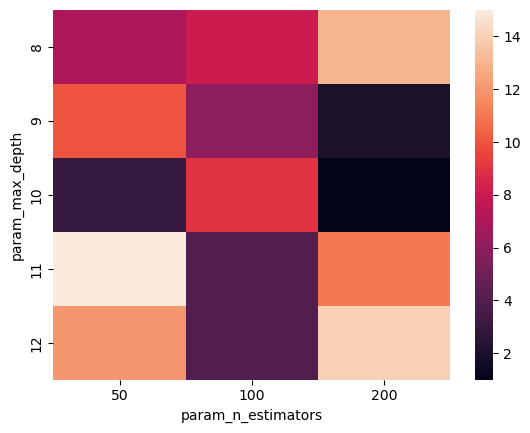

In [36]:
pvt = pd.pivot_table(pd.DataFrame(gs_results.cv_results_),
    values='rank_test_score', index='param_max_depth', columns=['param_n_estimators'])
ax = sns.heatmap(pvt)
plt.show(ax)

In [37]:
forest = RandomForestClassifier(max_depth = 8, n_estimators = 100)
forest.fit(X_train_projection,y_train)
y_pred = forest.predict(X_test_projection)

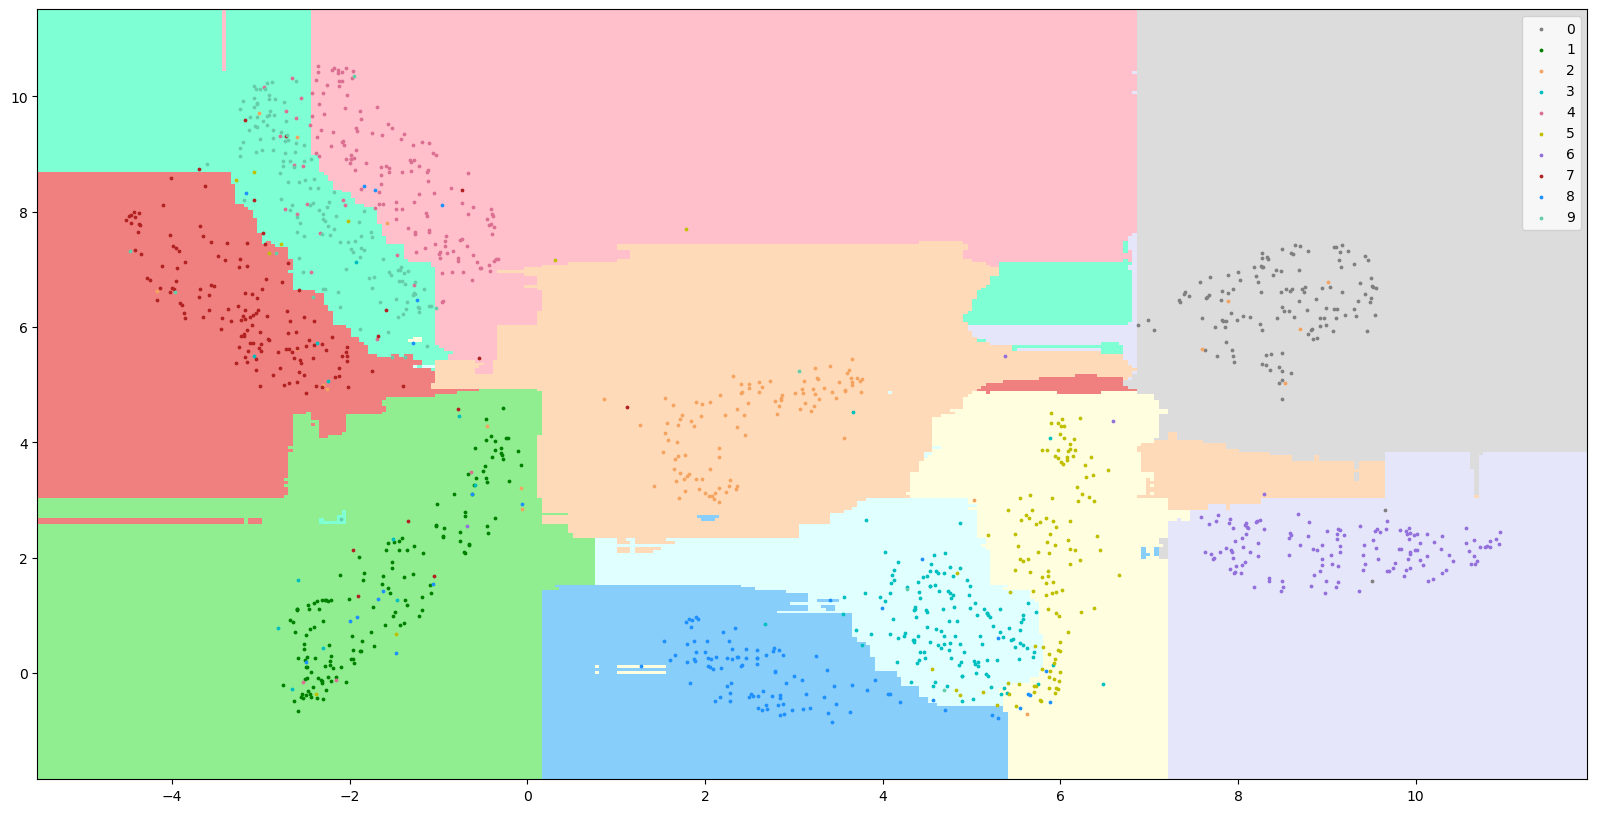

In [38]:
plot_decision_boundaries(forest, X_test_projection, y_test)
plt.show()

In [39]:
print('Accuracy del Tree Classifier en training set: {:.2f}'.format(forest.score(X_train_projection, y_train)))
print('Accuracy del Tree Classifier en test set: {:.2f}'.format(forest.score(X_test_projection, y_test)))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
      
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy del Tree Classifier en training set: 0.93
Accuracy del Tree Classifier en test set: 0.90
Confusion matrix:
[[127   0   0   0   0   0   2   0   0   0]
 [  0 148   0   0   0   0   0   0   0   0]
 [  5   3 103   0   1   2   0   5   0   2]
 [  0   8   1 130   0   7   0   3   4   1]
 [  0   3   0   0 130   0   0   0   0  23]
 [  0   2   0  11   2 108   0   1   0   4]
 [  0   1   2   0   0   1 141   0   0   0]
 [  0   5   1   0   2   0   0 136   0   8]
 [  0   9   0   4   3   6   0   0  95   3]
 [  0   0   1   2   2   0   0   6   0 136]]
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       129
           1       0.83      1.00      0.91       148
           2       0.95      0.85      0.90       121
           3       0.88      0.84      0.86       154
           4       0.93      0.83      0.88       156
           5       0.87      0.84      0.86       128
           6       0.99      0.97      0.98       1